# Комп'ютерне моделювання задач прикладної математики

## Основи класичної молекулярної динаміки. 

###  Лабораторна робота 2

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 1*

In [1]:
from matplotlib import pyplot as plt

In [2]:
import random
import numpy as np
import math
import time

In [3]:
count = 10 # кількість частинок

Розраховуємо випадкову величину.

In [4]:
def randV():
    #random.seed(s)
    max_num = 2147483647
    ksi = random.randint(0, max_num) / (max_num+1) # ksi = rand_r(&seedp)/(RAND_MAX+1.0);
    return ksi
#randV()

Розраховуємо початкові значення координат $(x_0,y_0)$ та швидкостей частинок $(vx_{0},vy_{0})$, що знаходяться у резервуарі розміром $(Lx,Ly)$.

In [5]:
def Inital_XY(N=100, Lx = 20, Ly = 20, vmax = 20):
    x0,  y0   = np.zeros(N), np.zeros(N)
    vx0, vy0  = np.zeros(N), np.zeros(N)
    for i in range(N):
        x0[i] = randV()*Lx;
        y0[i] = randV()*Ly;
        vx0[i] = vmax*(2*randV() - 1);
        vy0[i] = vmax*(2*randV() - 1);
    return x0, y0, vx0, vy0
#x0_, y0_, vx0_, vy0_ = Inital_XY()

In [6]:
x0, y0, vx0, vy0 = Inital_XY(N=count)

Перевіряємо межі початкових значень,

In [7]:
print(min(x0),min(y0))
print(max(vx0), max(vy0))

0.45563272200524807 2.332343077287078
8.696286790072918 16.450089812278748


Перевіряємо розмірність масивів.

In [8]:
print(np.shape(x0),np.shape(y0), np.shape(vx0), np.shape(vy0))

(10,) (10,) (10,) (10,)


Виводимо перші 5 значень з кожного масиву.

In [9]:
list(zip(x0[:5], y0[:5]))

[(6.331618744879961, 15.141642168164253),
 (18.424385534599423, 10.052028484642506),
 (0.45563272200524807, 11.603333950042725),
 (0.5433681514114141, 16.333590550348163),
 (14.517122879624367, 12.030019732192159)]

In [10]:
list(zip(vx0[:5], vy0[:5])) 

[(-11.858040168881416, 16.175101436674595),
 (-10.006225500255823, -11.834053508937359),
 (-14.596377462148666, 13.971778433769941),
 (-2.8078273870050907, 6.42348563298583),
 (-6.485968232154846, 6.841713711619377)]

Будуємо графік координат декількох перших частинок (за замовчуванням їх буде 10 або всі). 

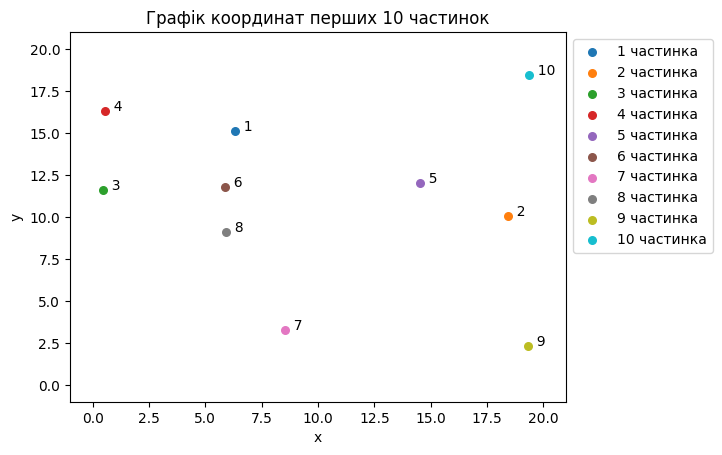

In [11]:
def fun_plot1(x, y, n=10):
    
    if (n < 2):
        n = 1   
    if (n > len(x)):
        n = len(x)   
    
    # 1 спосіб
    for i in range(n):
        plt.scatter(x[i], y[i], s=30, label=f'{i+1}' " частинка")
        plt.text(x[i], y[i], "  "f'{i+1}')
        
    # 2 спосіб
    #plt.scatter(x[:n], y[:n], s=20, c='m') 

    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Графік координат перших " f'{n}' " частинок" )
    if (n < 20):
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    ax = [0, 20, 0, 20]
    ax2=[-1, 21, -1, 21]
    ax3=[-1, 32, -1, 21]
    plt.axis(ax2)
    
fun_plot1(x0, y0) 

Розглянемо основнi iдеї методу молекулярної динамiки. Припустимо, що мiж N(N − 1)/2 парами частинок дiє двочастинковий потенцiал.  
$ \\ $   Як придатний приклад такого потенцiалу можна розглянути потенцiал Леннарда-Джонса 
$$ U(r_{12}) =  4\varepsilon \{ (\frac{\sigma}{r_{12}})^{12} - ( \frac{\sigma}{r_{12}})^6 \}$$
де $r_{12}$ — вiдстань мiж частинками 1 i 2,
$ \\ $ a $\varepsilon$ ("вiдстань" взаємодiї частинок 1 та 2) i σ (глибина потенцiальної ями або "енергiя") — сталi.

In [12]:
# (двочастинковий) потенцiал Леннарда-Джонса, що діє між N(N − 1)/2 парами частинками
def phi(r, sigma=1, eps=1):
    sr6 = (sigma/r)**6
    U_r = 4*eps*(sr6*sr6 - sr6)
    return U_r

Такий потенцiал добре описує притягання у випадку, коли частинки вiддаленi на значну вiдстань, i вiдштовхування, коли вони зближенi. У такому разi еволюцiя системи у часi вiдбувається вiдповiдно до детермiнiстичних законiв руху кожної частинки, причому сила взаємодiї $F_{ij}$ спрощується i подається так: 

$$ \overrightarrow{F}(|\overrightarrow{x_i}-\overrightarrow{x_j}|) = - \frac{\partial}{\partial \overrightarrow{x_i}}U(|\overrightarrow{x_i}-\overrightarrow{x_j}|) $$

In [13]:
# сила взаємодiї між частинкамии 
def F(r, sigma=1, eps=1):
    sr6 = (sigma/r)**6
    F_r = 24*eps*sigma/r*sr6*(2*sr6 - 1)
    return F_r

*Граничні умови (коли частинка виходить за межі резервуара)*

In [14]:
# жорсткі граничні умови
def Test11(X, Y, Vx, Vy, Lx=20, Ly=20):
    k=0
    while ((X < 0) | (X > Lx) | (Y < 0) | (Y > Ly)):
        if (X < 0):
            X = -X
            Vx = -Vx

        if (X > Lx):
            X = Lx-(X-Lx)
            Vx = -Vx

        if (Y < 0):
            Y = -Y
            Vy = -Vy 

        if (Y > Ly):
            Y = Ly-(Y-Ly)
            Vy = -Vy
        k+=1
    
    return X, Y, Vx, Vy, k

#X_, Y_, Vx_, Vy_, k_ = Test11(X=-4, Y=250, Vx=9, Vy=8, Lx=20, Ly=20) 
#print(X_, Y_, Vx_, Vy_) #4 10 -9 8

Використовуємо алгоритм Ейлера і розраховуємо координати $(x,y)$ частинок з часом. 

### $$ Алгоритм \ Ейлера $$

$$ a_{xi} = \frac{F(x_i, y_i)}{m_i}=-\frac{1}{m_i}\frac{\partial}{\partial{x_i}} U(x_i, y_i) $$
$$ a_{yi} = \frac{F(x_i, y_i)}{m_i}=-\frac{1}{m_i}\frac{\partial}{\partial{y_i}} U(x_i, y_i) $$

$$ x_i(t+\Delta t) = x_i(t) + v_{xi}(t)\Delta t $$ 
$$ y_i(t+\Delta t) = y_i(t) + v_{yi}(t)\Delta t $$

$$ v_{xi}(t+\Delta t) = v_{xi}(t) + a_{xi}(t)\Delta t $$ 
$$ v_{yi}(t+\Delta t) = v_{yi}(t) + a_{yi}(t)\Delta t $$

$$ a = \frac{dv}{dt} = \frac{d^2x}{dt^2} $$
$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = a $$

In [15]:
def funct1(x0, y0, vx0, vy0, mas=1, Lx=20, Ly=20, test_ = "Test11"):
    
    N = len(x0) # к-сть частинок
    
    t = 0       # початковий час
    t_fin = 20  # кінцевий час
    dt = 0.0002 # крок по часу
    
    # тимчасовий масив координат та швидкостей
    x_n, y_n = np.zeros(N), np.zeros(N)
    vx_n, vy_n = np.zeros(N), np.zeros(N)
    
    size1 = t_fin/dt + 1
    size1 = int(size1)
    
    k = 0     # лічильник для масивів X_time, Y_time (координат кожної частинки для кожного проміжку часу)
    times = []
    X_time = np.zeros((size1, N))
    Y_time = np.zeros((size1, N))
    
    U, Temp, KinE = [], [], []
    u, T, kinE = 0, 0, 0
    
    while(t <= t_fin):
        t = round(t, 4)
        if (t % 5 == 0):
            print("time =", t)
            
        if (t == 0):
            x, y = x0, y0
            vx, vy = vx0, vy0
        
        for i in range(N):
                
            X, Y = x[i], y[i]
            Vx, Vy = vx[i], vy[i]
            
            X1 = X + Vx*dt
            Y1 = Y + Vy*dt
            
            fx, fy = 0, 0 
            #u = 0
            for j in range(N):
                if (j!=i):
                    rx = X1 - x[j]
                    ry = Y1 - y[j]
                    r = math.sqrt(rx*rx + ry*ry)      
                    if (r < math.sqrt(Lx*Lx + Ly*Ly)):
                        Fr = F(r)
                        Fr = Fr/mas
                        fx += (Fr * rx / r)
                        fy += (Fr * ry / r)
                        u += phi(r)
            
            Vx1 = Vx + fx*dt
            Vy1 = Vy + fy*dt
                
            if (test_ == "Test11"):
                X1, Y1, Vx1, Vy1, steps = Test11(X1, Y1, Vx1, Vy1)
   
            x_n[i], y_n[i] = X1, Y1
            vx_n[i], vy_n[i] = Vx1, Vy1
            
            #T += vx_n[i]*vx_n[i] + vy_n[i]*vy_n[i]
            
            kinE += 0.5*(mas*(Vx1*Vx1 + Vy1*Vy1))
        
        times.append(t)
        
        #T = T / N
        #Temp.append(T)
        
        kinE = kinE / N     
        KinE.append(kinE)     
        
        u = u / N
        U.append(u)
        
        X_time[k][:] = x_n
        Y_time[k][:] = y_n
        k += 1
        
        x, y = x_n, y_n
        vx, vy = vx_n, vy_n
        
        t += dt
        
    return times, X_time, Y_time, U, KinE

In [16]:
start_time = time.time()
times1, X_time1, Y_time1, U1, K1 = funct1(x0, y0, vx0, vy0)
print("Ця частина коду виконувалася %s seconds." % round(time.time() - start_time)) 

time = 0
time = 5.0
time = 10.0
time = 15.0
time = 20.0
Ця частина коду виконувалася 35 seconds.


Перевіримо розмірність нових масивів.

In [17]:
print("times1 \t", np.shape(times1))
print("X_time1\t", np.shape(X_time1))
print("Y_time1\t", np.shape(Y_time1))
print("U1 \t",   np.shape(U1))
print("K1 \t",   np.shape(K1))

times1 	 (100001,)
X_time1	 (100001, 10)
Y_time1	 (100001, 10)
U1 	 (100001,)
K1 	 (100001,)


Побудуємо графік.

Порахуємо повну енергію $ E = U + K $, де $ U $ - потенціальна енергія, а $ K $ - кінетична енергія.

$$ U = < \sum{\sum{\varphi (|\overrightarrow{r_i}(t)-\overrightarrow{r_j}(t)|) }} > $$

$$ K = < \frac{1}{2} \sum{ m_i v_i^2 (t) } > $$

In [18]:
#E1 = U1 + K1
E1 = []
if (len(U1) == len(K1)):
    for i in range(len(U1)):
        E1.append(U1[i] + K1[i])
        

Побудуємо графік залежності енергій від часу.

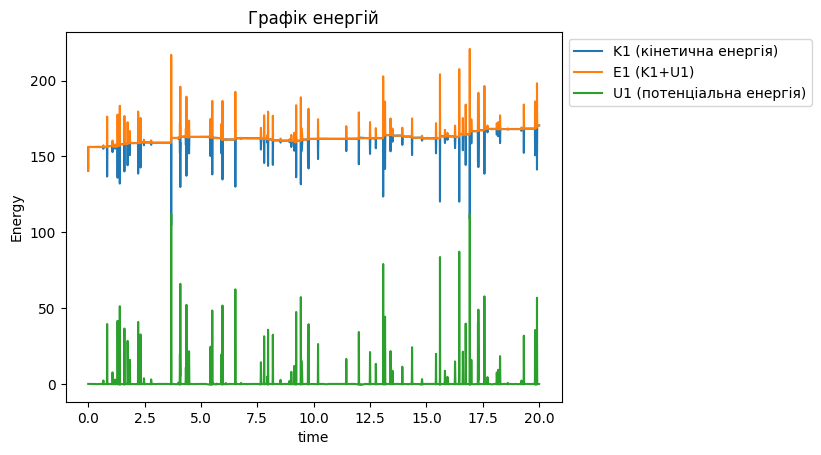

In [19]:
tt = times1

plt.plot(tt, K1, label = "K1 (кінетична енергія)")
plt.plot(tt, E1, label = "E1 (K1+U1)")
plt.plot(tt, U1, label = "U1 (потенціальна енергія)")

plt.xlabel("time") 
plt.ylabel("Energy")
plt.title("Графік енергій")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

Побудуємо графік еволюції координат якоїсь частинки. Наприклад, візьмемо першу (її індекс = 0).

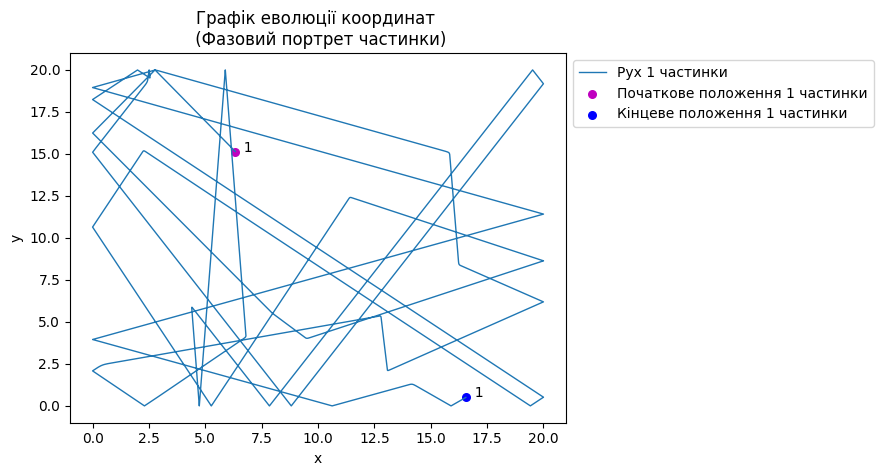

In [20]:
def fun_plot1(t, x0, y0, x, y, n=0):
    # n - номер частинки з (0..N), на графіку буде 0 частинка => n+1 = 1 частинка для зручності сприйняття
    
    #p = plt.figure(figsize=(7,6))  #color=[1, 1, 0] #RGB (0,0,0)...(1.1.1)
    
    # свторимо нові масиви координатзаписавши спочатку початкові координати частинки, 
    # а потім ті які були розраховані в процесі моделювання
    xx1, yy1 = [], []
    xx1.append (x0[n])
    yy1.append (y0[n])
    for i in range(len(x)):
        xx1.append (x[i][n])
        yy1.append (y[i][n])
    
    lx = len(xx1)-1              # остан.індекс для нових масивів 
    cond1 = (xx1[0] == x0[n])
    cond2 = (yy1[0] == y0[n])
    
    lt = len(t)-1                # остан.індекс для масиву часу
    cond3 = (xx1[lx] == x[lt][n])
    cond4 = (yy1[lx] == y[lt][n])
    
    # перевірка відповідності елементів нових та старих масивів та побудова елементів графіку еволюціїї частинки
    if (cond1 & cond2 & cond3 & cond4):
        plt.plot(xx1, yy1, linewidth = 1, label="Рух "f'{n+1}' " частинки") 
        plt.scatter(xx1[0],  yy1[0],  s=30, color='m', label="Початкове положення "f'{n+1}'" частинки")
        plt.scatter(xx1[lx], yy1[lx], s=30, color='b', label="Кінцеве положення "f'{n+1}'" частинки")
        plt.text(xx1[0],  yy1[0],  "  "f'{n+1}')
        plt.text(xx1[lx], yy1[lx], "  "f'{n+1}')
    
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Графік еволюції координат \n (Фазовий портрет частинки)")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    #ax1 = [0, 20, 0, 20]
    ax2 = [-1, 21, -1, 21]
    plt.axis(ax2)
    #plt.show()
    
fun_plot1(times1, x0, y0, X_time1, Y_time1, n=0)  #графік еволюції координат 1 частинки
#fun_plot1(times1, x0, y0, X_time1, Y_time1, n=1) #графік еволюції координат 2 частинки
#fun_plot1(times1, x0, y0, X_time1, Y_time1, n=2) #графік еволюції координат 3 частинки

Побудуємо графік еволюції координат декількох частинок. Наприклад, візьмемо перші 3 (їх індекси = 0...2).

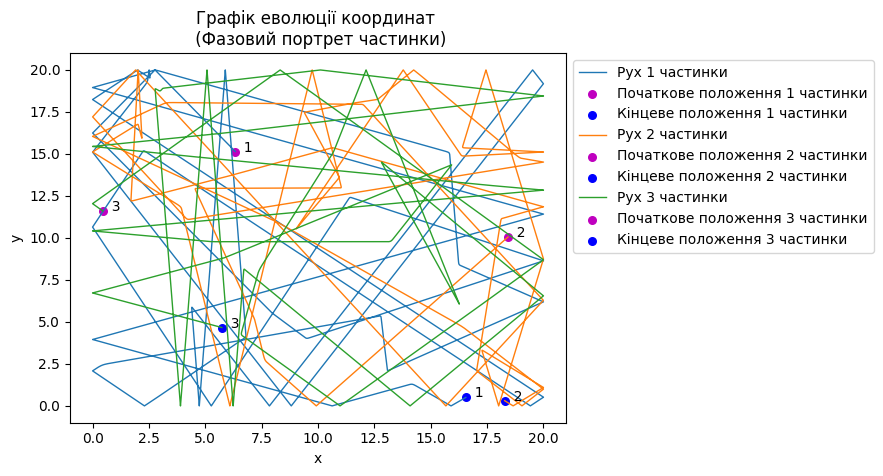

In [21]:
# count - к-сть частинок (10)
for i in range(count-7):
    fun_plot1(times1, x0, y0, X_time1, Y_time1, n=i)

$R(t)^2$ — середнiй квадрат зсуву, розрахований за формулою 
$$ R(t)^2 = \ < |r_i(t_2) - r_i(t_1)|^2 > $$
де $ r_i = \sqrt{(x_i - x_{i0})^2 + (y_i - y_{i0})^2}, <>$ - оператор усереднення за всіма частинками.

Розрахуємо цю величину та побудуємо графік її залежності від часу. 

In [22]:
def funct_R_t2(times, x0, y0, x, y): 
    N = len(x0)
    T = len(times)
    r1, r2 = 0, 0
    R_t2 = np.zeros(T-1)
    time_new = np.zeros(T-1)
    
    t_write = 0.1  # початковий омент часу для запису
    dt_write = 0.2 # крок для запису даних 
    
    t_wr, R_wr  = [], []
    dR, R = 0,0
    
    for t in range(T-1): # 0...50000-1 бо беремо по парам час [t0, t1], [t1, t2],..
        for i in range(N): # 0..9
            
            x1 = x[t][i]
            dx = x1 - x0[i]
            y1 = y[t][i]
            dy = y1 - y0[i]
           
            r1 = math.sqrt(dx*dx + dy*dy)
            
            x2 = x[t+1][i]
            dx2 = x2 - x0[i]
            y2 = y[t+1][i]
            dy2 = y2 - y0[i]
           
            r2 = math.sqrt(dx2*dx2 + dy2*dy2)
            
            dR = abs(r2 - r1)
            dR = dR**2
            R += dR
         
        R_t2[t] = R / N
        
        if(times[t] >= t_write):
            t_wr.append(times[t])
            R_wr.append(R_t2[t])
            t_write += dt_write
            
        time_new[t] = times[t]     
        
    return time_new, R_t2, t_wr, R_wr

In [23]:
time_new, R_t2, t_wr, R_wr = funct_R_t2(times1, x0, y0, X_time1, Y_time1)

In [24]:
print("time_new ",   np.shape(time_new))
print("R_t2     ",   np.shape(R_t2))
print("t_wr     ",  np.shape(t_wr))
print("R_wr     ",  np.shape(R_wr))

time_new  (100000,)
R_t2      (100000,)
t_wr      (100,)
R_wr      (100,)


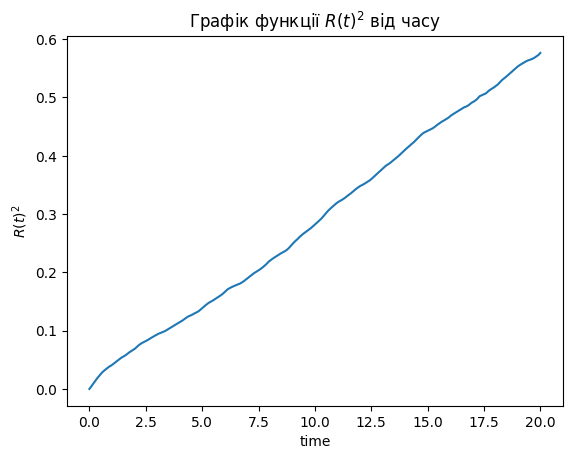

In [25]:
def fun_plot_Rt2(time, R_t2):
    plt.plot(time, R_t2)
    plt.title("Графік функції $R(t)^2$ від часу")
    plt.xlabel("time") 
    plt.ylabel("$R(t)^2$")
    plt.show()
    
fun_plot_Rt2(time_new, R_t2) 
#fun_plot_Rt2(t_wr, R_wr)    

### ---------------------------------------------------------------------------------------------